# Анализ поведения пользователей в мобильном приложении

# Описание проекта

**План исследования:**

**Загрузка данных и их изучение**
* Обзор таблиц на их размер и содержание
* Обзор на полноту данных
* Проверка типов данных

**Предобработка данных**
* Изменение типов данных
* Приведение названий столбцов к правильному формату
* Удаление дубликатов
* Заполнение/удаление пропусков

**Исследовательский анализ данных**
* Исследовать общее поведение пользователей: Retention Rate, время, проведённое в приложении, частота, конверсия
* Сделать промежуточные выводы для того, чтобы можно было приступить к следующему этапу (сегментация)

**Сегментация пользователей на группы на основе их действий**
* Выделить 3-4 группы пользователей, отличающихся в зависимости от своих действий в приложении и конечного результата
* Для каждой группы посчитать Retention Rate и конверсию 
* Убедиться в том, что разделение было верным (данные должны отличаться в зависимости от группы, в которой находится пользователь)

**Формулировка гипотез и их проверка** 
* Проверка гипотезы (Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверить гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов)
* Некоторые пользователи установили приложение по ссылке из Yandex, другие — из Google. Проверить гипотезу: две эти группы демонстрируют разную длительность пользовательских сессий

**Выводы**

**Рекомендации**

**Построение дашборда**

**Подготовка презентации**

# Описание данных

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после **7 октября 2019 года**.

Колонки в `mobile_sources.csv`: 

- `userId` — **идентификатор пользователя**
- `source` — **источник, с которого пользователь установил приложение**

Колонки в mobile_dataset.csv:

- `event.time` — **время совершения**
- `user.id` — **идентификатор пользователя**
- `event.name` — **действие пользователя**

Виды действий:

- `advert_open` — **открыл карточки объявления**
- `photos_show` — **просмотрел фотографий в объявлении**
- `tips_show` — **увидел рекомендованные объявления**
- `tips_click` — **кликнул по рекомендованному объявлению**
- `contacts_show` и `show_contacts` — **посмотрел номер телефона**
- `contacts_call` — **позвонил по номеру из объявления**
- `map` — **открыл карту объявлений**
- `search_1`—`search_7` — **разные действия, связанные с поиском по сайту**
- `favorites_add` — **добавил объявление в избранное**

# Работа с проектом

# Открываю файл с данными и изучаю общую информацию

**Импортирую все необходимые библиотеки для проекта**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mth
import matplotlib.ticker as mtick
import warnings
import plotly.express as px
from plotly import graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', False)

**Открываю файлы с данными**

In [2]:
dataset = pd.read_csv('/datasets/mobile_dataset.csv')
sources = pd.read_csv('/datasets/mobile_soures.csv')

**Вывожу на экран первые 10 строк таблиц, изучаю данные**

In [3]:
display(dataset.head(10))
display(sources.head(10))

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
9,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
5,17f6b2db-2964-4d11-89d8-7e38d2cb4750,yandex
6,62aa104f-592d-4ccb-8226-2ba0e719ded5,yandex
7,57321726-5d66-4d51-84f4-c797c35dcf2b,google
8,c2cf55c0-95f7-4269-896c-931d14deaab5,google
9,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,yandex


**Вывожу сводную информацию о каждой таблице**

In [4]:
dataset.info()
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


**Вывожу на экран количество пользователей, которые пришли в приложении через разные источники трафика**

In [5]:
sources['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

**Пропусков в таблице нет, названия столбцов необходимо изменить для удобства, тип данных в столбце `event.name` не обходимо изменить, наличие дубликатов проверю в следующих этапах**

# Предобработка данных

**Переименовываю столбцы, привожу к змеиному регистру**

In [6]:
dataset = dataset.rename(
    columns={
        'event.time':'event_time',
        'event.name':'event_name',
        'user.id':'user_id'
    }
)

sources = sources.rename(
    columns={
        'userId':'user_id'
    }
)

**Проверяю таблицы на наличие дубликатов**

In [7]:
print('Количество дубликатов:',dataset.duplicated().sum())

Количество дубликатов: 0


In [8]:
print('Количество дубликатов:',sources.duplicated().sum())

Количество дубликатов: 0


**Дубликаты в таблицах отсутствуют**

**Привожу столбец `event.name` к необходимому формату, избавляюсь от милисекунд**

In [9]:
dataset['event_time'] = dataset['event_time'].astype('datetime64[s]')
dataset.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


**Проверяю таблицы на наличие дубликатов**

In [10]:
print('Количество дубликатов:',dataset.duplicated().sum())

Количество дубликатов: 1143


**Дубликаты появились после удаления милисекунд в `event_name`, чуть позже от них необходимо будет избавиться**

**Объединяю обе таблицы в одну по столбцу `user_id`, чтобы в дальнейшем было проще работать**

In [11]:
data = dataset.merge(sources, on='user_id', how='left')

**Проверяю количество дубликатов после объединения двух таблиц**

In [12]:
print('Количество дубликатов:',data.duplicated().sum())

Количество дубликатов: 1143


**Вывожу на экран сводную информацию о таблице**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


In [14]:
print('Процентное соотношение дубликатов к остальным данным:',round(1143*100/74197, 2), '%')

Процентное соотношение дубликатов к остальным данным: 1.54 %


**Так как процент дубликатов составляет всего лишь 1,54, можно смело их удалить, не беспокоясь о большой потере в данных**

**Удаляю дубликаты**

In [15]:
data = data.drop_duplicates()

**Вывожу на экран новую таблицу `data`, проверяю всю проделанную работу выше**

In [16]:
display(data.head(10))
data.info()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
5,2019-10-07 00:01:19,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
6,2019-10-07 00:01:27,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
7,2019-10-07 00:01:34,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
8,2019-10-07 00:01:49,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
9,2019-10-07 00:01:54,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73054 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  73054 non-null  datetime64[ns]
 1   event_name  73054 non-null  object        
 2   user_id     73054 non-null  object        
 3   source      73054 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


**Таблицы объединены в одну, дубликаты отсутствуют, пропуски отсутствуют, типы данных и названия столбцов верные. Теперь необходимо поработать над названиями в столбцах**

**Вывожу на экран уникальных пользователей в столбце `event_name`**

In [17]:
data['event_name'].value_counts()

tips_show        39907
photos_show      9352 
advert_open      6146 
contacts_show    4297 
map              3749 
search_1         3488 
favorites_add    1414 
search_5         1049 
tips_click       811  
search_4         701  
contacts_call    534  
search_3         521  
search_6         460  
search_2         324  
search_7         222  
show_contacts    79   
Name: event_name, dtype: int64

**Переименовывю виды действий из стобца `event_name` с `search_1`-`search_7` в `search`**

In [18]:
data['event_name'] = data['event_name'].str.replace('search_1', 'search', regex = True)
data['event_name'] = data['event_name'].str.replace('search_2', 'search', regex = True)
data['event_name'] = data['event_name'].str.replace('search_3', 'search', regex = True)
data['event_name'] = data['event_name'].str.replace('search_4', 'search', regex = True)
data['event_name'] = data['event_name'].str.replace('search_5', 'search', regex = True)
data['event_name'] = data['event_name'].str.replace('search_6', 'search', regex = True)
data['event_name'] = data['event_name'].str.replace('search_7', 'search', regex = True)

**Переименовываю виды действий из стобца `event_name` с `show_contacts` в `contacts_show`, так как по описанию данных это одно и то же действие**

In [19]:
data['event_name'] = data['event_name'].str.replace('show_contacts', 'contacts_show', regex = True)

**Вывожу на экран столбец `event_name`, проверяю проделанную работу**

**После объединения типов событий снова проверяю на наличие дубликатов**

In [20]:
print('Количество дубликатов:',data.duplicated().sum())
print('Процентное соотношение дубликатов к остальным данным:',round(81*100/73054, 2), '%')

Количество дубликатов: 81
Процентное соотношение дубликатов к остальным данным: 0.11 %


**Процент дубликатов составляет всего лишь 0,11, снова удаляю дубликаты без большой потери в данных**

In [21]:
data = data.drop_duplicates()

**Проверяю таблицу на дубликаты**

In [22]:
print('Количество дубликатов:',data.duplicated().sum())

Количество дубликатов: 0


In [23]:
data['event_name'].value_counts()

tips_show        39907
photos_show      9352 
search           6684 
advert_open      6146 
contacts_show    4376 
map              3749 
favorites_add    1414 
tips_click       811  
contacts_call    534  
Name: event_name, dtype: int64

# Итог предобработки данных:
* Объединены 2 таблицы в 1
* Столбцы приведены к змеиному регистру и переименованы
* Изменены типы данных
* Таблица проверена на наличие пропусков (не обнаружено)
* Таблица проверена на наличие дубликатов, дубликаты удалены
* Типы события объединены в 1

# Исследовательский анализ данных

**Вывожу на экран число уникальных пользователей в таблице**

In [24]:
data['user_id'].nunique()

4293

**Вывожу на экран самую первую и последнюю пользовательские сессии**

In [25]:
data['event_time'].min()

Timestamp('2019-10-07 00:00:00')

In [26]:
data['event_time'].max()

Timestamp('2019-11-03 23:58:12')

**Первая пользовательская сессия была 7 октября в 00:00, последняя - 3 ноября в 23:58:12**

**Строю гистограмму распределения события по датам**

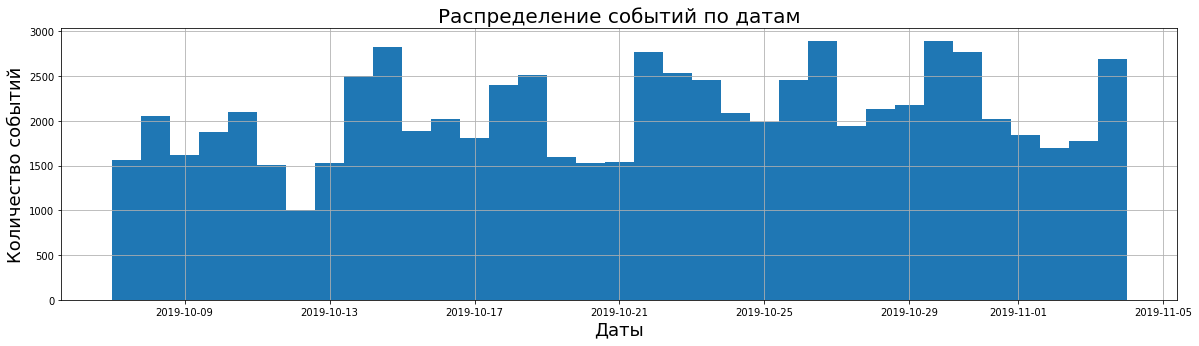

In [27]:
data['event_time'].hist(bins=35, figsize =(20, 5))
plt.title('Распределение событий по датам', fontsize=20)
plt.xlabel('Даты', fontsize=18)
plt.ylabel('Количество событий', fontsize=18)
plt.show()

**На графике заметен спад количества событий 12 октября, в остальном события циклично повторяются каждую неделю**

# Анализирую время, проведённое пользователями в приложении

**Добавляю в таблицу отдельный столбец с датой без времени, вывожу на экран таблицу**

In [28]:
data['event_date'] = data['event_time'].astype('datetime64[D]')
data

,event_time,event_name,user_id,source,event_date
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
...,...,...,...,...,...
74192,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03
74194,2019-11-03 23:56:57,search,20850c8f-4135-4059-b13b-198d3ac59902,google,2019-11-03
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03


**Создаю таблицу длительности сессий, взяв 1 сессию максимум за 1 календарный день**

**Создаю таблицы максимальных и минимальных значений времени в течение одного дня для уникального пользователя**

In [29]:
session_min = data.groupby(['user_id', 'event_date'])['event_time'].agg('min').reset_index()
session_max = data.groupby(['user_id', 'event_date'])['event_time'].agg('max').reset_index()

**Объединяю обе таблицы в одну по столбцам `user_id` и `event_date`, переименовываю столбцы, вывожу таблицу на экран**

In [30]:
session = session_max.merge(session_min, on = ['user_id', 'event_date'], how = 'left')
session = session.rename(columns = {'event_time_x':'event_time_max', 'event_time_y':'event_time_min'})
session

,user_id,event_date,event_time_max,event_time_min
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:41,2019-10-07 13:39:45
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:42:22,2019-10-09 18:33:55
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 20:07:30,2019-10-21 19:52:30
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:30:52,2019-10-22 11:18:14
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:59:54,2019-10-19 21:34:33
...,...,...,...,...
7812,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-29,2019-10-29 16:13:00,2019-10-29 13:58:47
7813,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-30,2019-10-30 11:31:45,2019-10-30 00:15:43
7814,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-01,2019-11-01 00:24:53,2019-11-01 00:24:31
7815,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,2019-11-02 19:30:50,2019-11-02 01:16:48


**Создаю столбец с разницей максимального и минимального значения длительности действий в приложении уникальным пользователем в течение дня, вывожу таблицу на экран**

In [31]:
session['session_duration'] = (session['event_time_max'] - session['event_time_min']).dt.seconds
session

,user_id,event_date,event_time_max,event_time_min,session_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:41,2019-10-07 13:39:45,596
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:42:22,2019-10-09 18:33:55,507
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 20:07:30,2019-10-21 19:52:30,900
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:30:52,2019-10-22 11:18:14,758
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:59:54,2019-10-19 21:34:33,1521
...,...,...,...,...,...
7812,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-29,2019-10-29 16:13:00,2019-10-29 13:58:47,8053
7813,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-30,2019-10-30 11:31:45,2019-10-30 00:15:43,40562
7814,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-01,2019-11-01 00:24:53,2019-11-01 00:24:31,22
7815,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,2019-11-02 19:30:50,2019-11-02 01:16:48,65642


**Создаю столбец, в котором перевожу значения длительности сессии из секунд в минуты, вывожу таблицу на экран**

In [32]:
session['session_duration_minute'] = (session['session_duration']/60).round(1)
session

,user_id,event_date,event_time_max,event_time_min,session_duration,session_duration_minute
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:41,2019-10-07 13:39:45,596,9.9
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:42:22,2019-10-09 18:33:55,507,8.4
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 20:07:30,2019-10-21 19:52:30,900,15.0
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:30:52,2019-10-22 11:18:14,758,12.6
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:59:54,2019-10-19 21:34:33,1521,25.4
...,...,...,...,...,...,...
7812,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-29,2019-10-29 16:13:00,2019-10-29 13:58:47,8053,134.2
7813,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-30,2019-10-30 11:31:45,2019-10-30 00:15:43,40562,676.0
7814,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-01,2019-11-01 00:24:53,2019-11-01 00:24:31,22,0.4
7815,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,2019-11-02 19:30:50,2019-11-02 01:16:48,65642,1094.0


**Вывожу на экран числовое описание данных для `session['session_duration_minute']`**

In [33]:
session['session_duration_minute'].describe().round(1)

count    7817.0
mean     83.0  
std      190.2 
min      0.0   
25%      2.5   
50%      11.8  
75%      48.8  
max      1417.5
Name: session_duration_minute, dtype: float64

**Строю гистограмму длительности сессий в зависимости от числа пользователей**

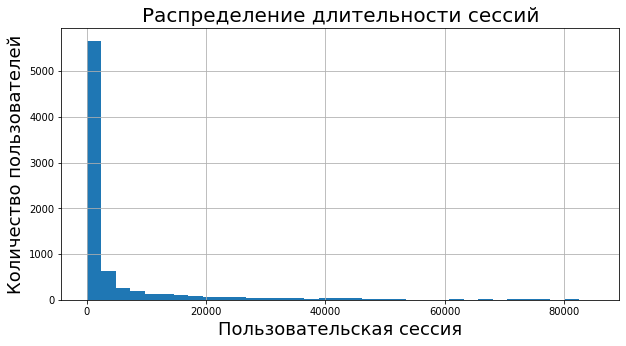

In [34]:
session['session_duration'].hist(bins=35, figsize =(10, 5))
plt.title('Распределение длительности сессий', fontsize=20)
plt.xlabel('Пользовательская сессия', fontsize=18)
plt.ylabel('Количество пользователей', fontsize=18)
plt.show()

**Судя по результатам, максимальная длительность сессии в сутки составила почти 1417 минут, 25% пользователей тратят в сутки 2.5 минуты, 50% пользоваталей пользуются приложением всего 11.8 минут в сутки, 75% пользователей пользуются приложением 48.8 минут в сутки**

# Анализирую частоту совершаемых действий в приложении

**Вывожу на экран количество уникальных значений каждого типа действий**

In [35]:
frequency = data['event_name'].value_counts()
frequency

tips_show        39907
photos_show      9352 
search           6684 
advert_open      6146 
contacts_show    4376 
map              3749 
favorites_add    1414 
tips_click       811  
contacts_call    534  
Name: event_name, dtype: int64

**Строю гистограмму частоты совершаемых действий в приложении**

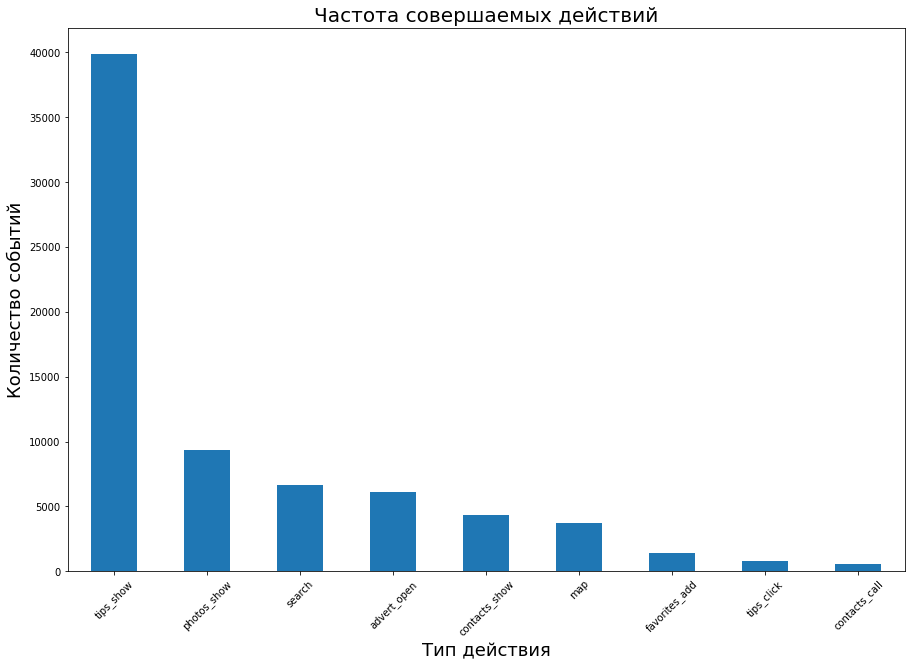

In [36]:
frequency.plot(kind='bar', figsize=(15, 10))
plt.title('Частота совершаемых действий', fontsize=20)
plt.xlabel('Тип действия', fontsize=18)
plt.ylabel('Количество событий', fontsize=18)
plt.xticks(rotation=45)
plt.show()

**Топ 3 самых частых совершаемых действий пользователей в приложении:**
* увидел рекомендованные объявления
* просмотрел фотографий в объявлении
* разные действия, связанные с поиском по сайту

**Пользователи видят рекомендованные объялвения более, чем в 4 раз чаще, чем любое другое действие в приложении**

# Рассчитываю Retention Rate

**Создаю таблицу `first_event`, в которой определяю, когда каждый пользователь впервые совершил действие в приложении, вывожу её на экран, называю столбец с минимальной датой совершённого действия `start_dt`**

In [37]:
first_event = data.groupby(['user_id'])['event_date'].min()
first_event.name = 'start_dt'
first_event

user_id
0001b1d5-b74a-4cbf-aeb0-7df5947bf349   2019-10-07
00157779-810c-4498-9e05-a1e9e3cedf93   2019-10-19
00463033-5717-4bf1-91b4-09183923b9df   2019-11-01
004690c3-5a84-4bb7-a8af-e0c8f8fca64e   2019-10-18
00551e79-152e-4441-9cf7-565d7eb04090   2019-10-25
                                          ...    
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07   2019-10-13
ffc01466-fdb1-4460-ae94-e800f52eb136   2019-10-07
ffcf50d9-293c-4254-8243-4890b030b238   2019-10-23
ffe68f10-e48e-470e-be9b-eeb93128ff1a   2019-10-21
fffb9e79-b927-4dbb-9b48-7fd09b23a62b   2019-10-12
Name: start_dt, Length: 4293, dtype: datetime64[ns]

**Создаю новую таблицу, объеденив в ней по столбцу `user_id` таблицы `data` и `first_event`, вывожу её на экран**

In [38]:
data_active = data.merge(first_event, on='user_id', how='left')
data_active

,event_time,event_name,user_id,source,event_date,start_dt
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,2019-10-07
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,2019-10-07
...,...,...,...,...,...,...
72968,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16
72969,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16
72970,2019-11-03 23:56:57,search,20850c8f-4135-4059-b13b-198d3ac59902,google,2019-11-03,2019-10-27
72971,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16


**Создаю столбцы `active_week` и `first_week`, которые будут содержать даты, которые были посчитаны путём вычисления интервалов времени, соответствующих дням недели**

In [39]:
data_active['active_week'] = pd.to_datetime(data_active['event_date'], unit='d') - pd.to_timedelta(data_active['event_date']
                                                                                                   .dt.dayofweek, unit='d')
data_active['first_week'] = pd.to_datetime(data_active['start_dt'], unit='d') - pd.to_timedelta(data_active['start_dt']
                                                                                                .dt.dayofweek, unit='d')

**Вывожу на экран таблицу с новыми столбцами**

In [40]:
data_active

,event_time,event_name,user_id,source,event_date,start_dt,active_week,first_week
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07,2019-10-07,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07,2019-10-07,2019-10-07
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,2019-10-07,2019-10-07,2019-10-07
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07,2019-10-07,2019-10-07
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,2019-10-07,2019-10-07,2019-10-07
...,...,...,...,...,...,...,...,...
72968,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16,2019-10-28,2019-10-14
72969,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16,2019-10-28,2019-10-14
72970,2019-11-03 23:56:57,search,20850c8f-4135-4059-b13b-198d3ac59902,google,2019-11-03,2019-10-27,2019-10-28,2019-10-21
72971,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16,2019-10-28,2019-10-14


**Выписываю для себя обозначения новых столбцов, чтобы не запутаться:**
* event_date - дата совершения действия
* start_dt - впервые совершённое действие пользователем
* active_week - день начала недели, за которую произошло событие
* first_week - день начала первой недели, в которую произошло событие 

Всего выделяется 4 недели: 7 октября, 14 октября, 21 октября и 28 октября

**Считаю lifetime пользователей в неделях, вывожу на экране таблицу**

In [41]:
data_active['lifetime'] = data_active['active_week'] - data_active['first_week']
data_active['lifetime'] = data_active['lifetime'] / np.timedelta64(1,'W')
data_active

,event_time,event_name,user_id,source,event_date,start_dt,active_week,first_week,lifetime
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0.0
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0.0
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0.0
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0.0
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0.0
...,...,...,...,...,...,...,...,...,...
72968,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16,2019-10-28,2019-10-14,2.0
72969,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16,2019-10-28,2019-10-14,2.0
72970,2019-11-03 23:56:57,search,20850c8f-4135-4059-b13b-198d3ac59902,google,2019-11-03,2019-10-27,2019-10-28,2019-10-21,1.0
72971,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16,2019-10-28,2019-10-14,2.0


**Вывожу сводную информацию о таблице**

In [42]:
data_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72973 entries, 0 to 72972
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   event_time   72973 non-null  datetime64[ns]
 1   event_name   72973 non-null  object        
 2   user_id      72973 non-null  object        
 3   source       72973 non-null  object        
 4   event_date   72973 non-null  datetime64[ns]
 5   start_dt     72973 non-null  datetime64[ns]
 6   active_week  72973 non-null  datetime64[ns]
 7   first_week   72973 non-null  datetime64[ns]
 8   lifetime     72973 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 5.6+ MB


**Меняю тип данных столбца `lifetime` с float(дробного) на int(целый), вывожу таблицу на экран**

In [43]:
data_active['lifetime'] = data_active['lifetime'].astype(int)
data_active

,event_time,event_name,user_id,source,event_date,start_dt,active_week,first_week,lifetime
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0
...,...,...,...,...,...,...,...,...,...
72968,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16,2019-10-28,2019-10-14,2
72969,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16,2019-10-28,2019-10-14,2
72970,2019-11-03 23:56:57,search,20850c8f-4135-4059-b13b-198d3ac59902,google,2019-11-03,2019-10-27,2019-10-28,2019-10-21,1
72971,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,2019-10-16,2019-10-28,2019-10-14,2


**Создаю таблицу, в которой группирую данные по `first_week` и `lifetime`, вывожу на экран**

In [44]:
cohorts = data_active.groupby(['first_week','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts

,first_week,lifetime,user_id
0,2019-10-07,0,1130
1,2019-10-07,1,272
2,2019-10-07,2,170
3,2019-10-07,3,119
4,2019-10-14,0,1166
5,2019-10-14,1,282
6,2019-10-14,2,155
7,2019-10-21,0,1094
8,2019-10-21,1,239
9,2019-10-28,0,903


**Выделяю число пользователей в каждой нулевой неделе, вывожу на экран таблицу**

In [45]:
users_count0 = cohorts[cohorts['lifetime'] == 0][['first_week','user_id']]
users_count0

,first_week,user_id
0,2019-10-07,1130
4,2019-10-14,1166
7,2019-10-21,1094
9,2019-10-28,903


**Переименовываю столбец `user_id` в `cohort_users0`, вывожу таблицу на экран**

In [46]:
users_count0 = users_count0.rename(columns={'user_id': 'cohort_users0'})
users_count0

,first_week,cohort_users0
0,2019-10-07,1130
4,2019-10-14,1166
7,2019-10-21,1094
9,2019-10-28,903


**Объединяю таблицы `users_count0` и `cohorts` по столбцу `first_week`, вывожу на экран таблицу**

In [47]:
cohorts = users_count0.merge(cohorts, on='first_week', how='left')
cohorts

,first_week,cohort_users0,lifetime,user_id
0,2019-10-07,1130,0,1130
1,2019-10-07,1130,1,272
2,2019-10-07,1130,2,170
3,2019-10-07,1130,3,119
4,2019-10-14,1166,0,1166
5,2019-10-14,1166,1,282
6,2019-10-14,1166,2,155
7,2019-10-21,1094,0,1094
8,2019-10-21,1094,1,239
9,2019-10-28,903,0,903


**Подготовительные работы для подсчёта Retention Rate были сделаны, теперь можно посчитать Retention Rate**

In [48]:
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users0']
retention = cohorts.pivot_table(index='first_week', columns='lifetime', values='retention', aggfunc='sum')
retention

lifetime,0,1,2,3
first_week,,,,
2019-10-07,1.0,0.240708,0.150442,0.10531
2019-10-14,1.0,0.241852,0.132933,NaN
2019-10-21,1.0,0.218464,NaN,NaN
2019-10-28,1.0,NaN,NaN,NaN


**Строю хитмэп**

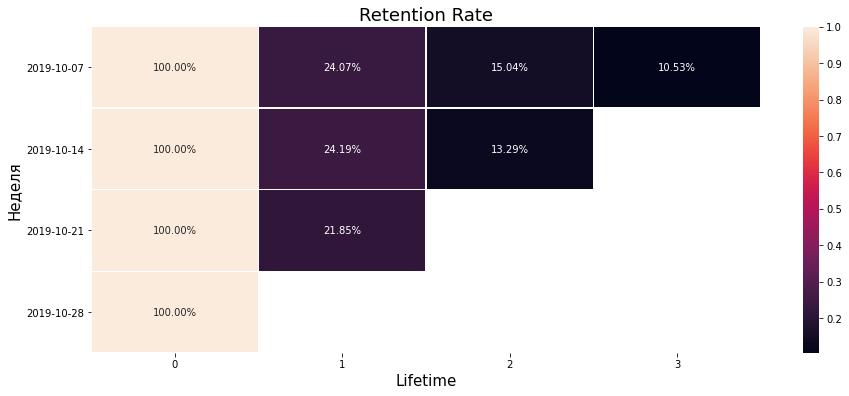

In [49]:
plt.figure(figsize=(15, 6))  # задаём размер графика
ax = sns.heatmap(
    retention,  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
    linewidths=0.5
)
plt.xlabel('Lifetime', fontsize=15)
plt.ylabel('Неделя', fontsize=15)
plt.title('Retention Rate', fontsize=18)# название графика
ax.set_yticklabels(retention.index.date)
plt.show() 

**Рассчитываю средний коэффициент удержания когорт**

In [50]:
print('2 неделя', ((retention[1].mean())*100).round(2), '%')
print('3 неделя', ((retention[2].mean())*100).round(2), '%')
print('4 неделя', ((retention[3].mean())*100).round(2), '%')

2 неделя 23.37 %
3 неделя 14.17 %
4 неделя 10.53 %


**Средние коэффициенты удержания:**
* 2 неделя - 23,37%
* 3 неделя - 14,17%
* 4 неделя - 10,53%

**Ко второй неделе жизни когорт коэффициент удержания примерно 23%, к концу 4 недели пользователей остаётся всего 10,5%**

# Рассчитываю конверсию

**Создаю таблицу для рассчёта конверсии, вывожу её на экран**

In [51]:
conversion = data.query('event_name == "contacts_show"').agg({'user_id': 'nunique'}).reset_index()
conversion = conversion.rename(columns = {'index': 'user_id', 0: 'user_contacts_show'})
conversion

,user_id,user_contacts_show
0,user_id,981


**Считаю конверсию отношением пользователей, совершивших целевое действие `contacts_show` к уникальным пользователям, вывожу таблицу на экран**

In [52]:
conversion['conversion'] = conversion['user_contacts_show'] / (data['user_id'].nunique())
conversion

,user_id,user_contacts_show,conversion
0,user_id,981,0.228512


**В среднем конверсия в приложении 22%, примерно каждый 4-5 пользователь просматривает номер телефона в приложении**

**Вывод по исследовательскому анализу данных:**
- Всего в данных 4293 уникальных пользователя
- Первая пользовательская сессия была 7 октября в 00:00, последняя - 3 ноября в 23:58:12
- На графике распределения событий по датам заметен спад количества событий 12 октября
- Максимальная длительность сессии в сутки составила почти 1417 минут, 25% пользователей тратят в сутки 2.5 минуты, 50% пользоваталей пользуются приложением всего 11.8 минут в сутки, 75% пользователей пользуются приложением 48.8 минут в сутки
- Пользователи видят рекомендованные объялвения более, чем в 4 раз чаще, чем любое другое действие в приложении
- Ко второй неделе жизни когорт Retention Rate примерно 23%, к концу 4 недели пользователей остаётся всего 10,5%
- В среднем конверсия в приложении 22%, примерно каждый 4-5 пользователь просматривает номер телефона в приложении

# Сегментация пользователей

**Думаю, вполне логично было бы разделить пользователей на 3 группы: `Yandex`, `Google` и `other`, после чего проверить конверсию и Retention Rate для каждой из групп**

**Пользователи попадают в приложение благодаря 3 источникам трафкам `Yandex`, `Google` и `other`. Источником трафика `other` могут быть другие социальные сети, а также другие поисковые сайты. Чтобы в дальнейшем настроить рекламу, чтобы привлечь более подходящих нам пользователей с более высокой конверсией и Retention Rate, мы можем разделить пользователей на 3 группы: `Yandex`, `Google` и `other`, посчитать Retention Rate и конверсию в каждой из групп, чтобы понять, через какой источник трафика стоит привлекать больше всего пользователей, а через какой - не нужно. В конечном итоге результаты этого раздлеления могли бы принести прибыль для приложения. В каждой группе пользователей мы имеем достаточно данных, чтобы это разделение получилось с хорошей выборкой (`Yandex` - 1934 пользователей, `Google` - 1129 пользователей, `Other` - 1230)**

- Пользователи не пересекаются между собой
- Самый маленький сегмент (`Other`) составляет более 10% от самого большого сегмента (`Yandex`)

# Рассчитываю Retention Rate для пользователей из каждой группы

**Создаю таблицу, в которой группирую данные по `first_week` и `lifetime` для каждой группы, вывожу на экран**

In [53]:
cohorts_google = data_active.query('source == "google"').groupby(['first_week','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts_google

,first_week,lifetime,user_id
0,2019-10-07,0,284
1,2019-10-07,1,60
2,2019-10-07,2,41
3,2019-10-07,3,29
4,2019-10-14,0,333
5,2019-10-14,1,77
6,2019-10-14,2,42
7,2019-10-21,0,288
8,2019-10-21,1,58
9,2019-10-28,0,224


In [54]:
cohorts_yandex = data_active.query('source == "yandex"').groupby(['first_week','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts_yandex

,first_week,lifetime,user_id
0,2019-10-07,0,538
1,2019-10-07,1,135
2,2019-10-07,2,74
3,2019-10-07,3,51
4,2019-10-14,0,506
5,2019-10-14,1,126
6,2019-10-14,2,66
7,2019-10-21,0,497
8,2019-10-21,1,111
9,2019-10-28,0,393


In [55]:
cohorts_other = data_active.query('source == "other"').groupby(['first_week','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts_other

,first_week,lifetime,user_id
0,2019-10-07,0,308
1,2019-10-07,1,77
2,2019-10-07,2,55
3,2019-10-07,3,39
4,2019-10-14,0,327
5,2019-10-14,1,79
6,2019-10-14,2,47
7,2019-10-21,0,309
8,2019-10-21,1,70
9,2019-10-28,0,286


**Объединяю таблицы `users_count0` и `cohorts_google` по столбцу `first_week`, `users_count0` и `cohorts_yandex`, затем `users_count0` и `cohorts_other`, вывожу таблицы на экран**

In [56]:
cohorts_google = users_count0.merge(cohorts_google, on='first_week', how='left')
cohorts_google

,first_week,cohort_users0,lifetime,user_id
0,2019-10-07,1130,0,284
1,2019-10-07,1130,1,60
2,2019-10-07,1130,2,41
3,2019-10-07,1130,3,29
4,2019-10-14,1166,0,333
5,2019-10-14,1166,1,77
6,2019-10-14,1166,2,42
7,2019-10-21,1094,0,288
8,2019-10-21,1094,1,58
9,2019-10-28,903,0,224


In [57]:
cohorts_yandex = users_count0.merge(cohorts_yandex, on='first_week', how='left')
cohorts_yandex

,first_week,cohort_users0,lifetime,user_id
0,2019-10-07,1130,0,538
1,2019-10-07,1130,1,135
2,2019-10-07,1130,2,74
3,2019-10-07,1130,3,51
4,2019-10-14,1166,0,506
5,2019-10-14,1166,1,126
6,2019-10-14,1166,2,66
7,2019-10-21,1094,0,497
8,2019-10-21,1094,1,111
9,2019-10-28,903,0,393


In [58]:
cohorts_other = users_count0.merge(cohorts_other, on='first_week', how='left')
cohorts_other

,first_week,cohort_users0,lifetime,user_id
0,2019-10-07,1130,0,308
1,2019-10-07,1130,1,77
2,2019-10-07,1130,2,55
3,2019-10-07,1130,3,39
4,2019-10-14,1166,0,327
5,2019-10-14,1166,1,79
6,2019-10-14,1166,2,47
7,2019-10-21,1094,0,309
8,2019-10-21,1094,1,70
9,2019-10-28,903,0,286


**Считаю Retention Rate для каждой группы пользователей**

In [59]:
cohorts_google['retention'] = cohorts_google['user_id']/cohorts_google['cohort_users0']
retention_google = cohorts_google.pivot_table(index='first_week', columns='lifetime', values='retention', aggfunc='sum')
retention_google

lifetime,0,1,2,3
first_week,,,,
2019-10-07,0.251327,0.053097,0.036283,0.025664
2019-10-14,0.285592,0.066038,0.036021,NaN
2019-10-21,0.263254,0.053016,NaN,NaN
2019-10-28,0.248062,NaN,NaN,NaN


In [60]:
cohorts_yandex['retention'] = cohorts_yandex['user_id']/cohorts_yandex['cohort_users0']
retention_yandex = cohorts_yandex.pivot_table(index='first_week', columns='lifetime', values='retention', aggfunc='sum')
retention_yandex

lifetime,0,1,2,3
first_week,,,,
2019-10-07,0.476106,0.119469,0.065487,0.045133
2019-10-14,0.433962,0.108062,0.056604,NaN
2019-10-21,0.454296,0.101463,NaN,NaN
2019-10-28,0.435216,NaN,NaN,NaN


In [61]:
cohorts_other['retention'] = cohorts_other['user_id']/cohorts_other['cohort_users0']
retention_other = cohorts_other.pivot_table(index='first_week', columns='lifetime', values='retention', aggfunc='sum')
retention_other

lifetime,0,1,2,3
first_week,,,,
2019-10-07,0.272566,0.068142,0.048673,0.034513
2019-10-14,0.280446,0.067753,0.040309,NaN
2019-10-21,0.282450,0.063985,NaN,NaN
2019-10-28,0.316722,NaN,NaN,NaN


**Строю хитмэп для каждой группы пользователей**

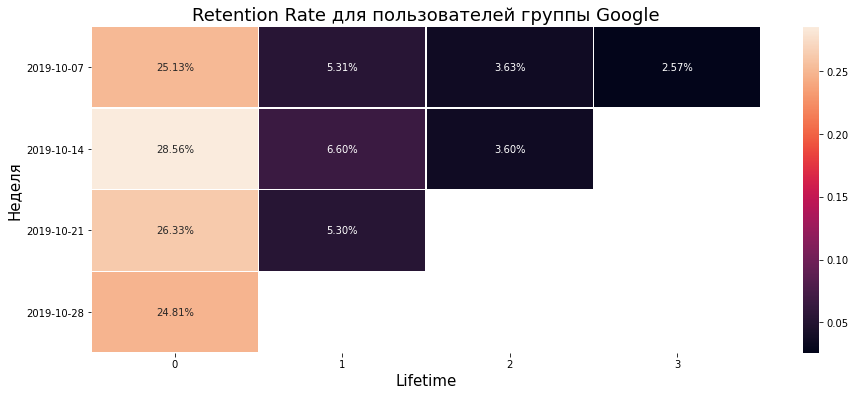

In [62]:
plt.figure(figsize=(15, 6))  # задаём размер графика
ax = sns.heatmap(
    retention_google,  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
    linewidths=0.5
)
plt.xlabel('Lifetime', fontsize=15)
plt.ylabel('Неделя', fontsize=15)
plt.title('Retention Rate для пользователей группы Google', fontsize=18)  # название графика
ax.set_yticklabels(retention_google.index.date)
plt.show() 

**Удержание пользователей `Google`:**
* 2 неделя - 5,71%
* 3 неделя - 3,62%
* 4 неделя - 2,57%

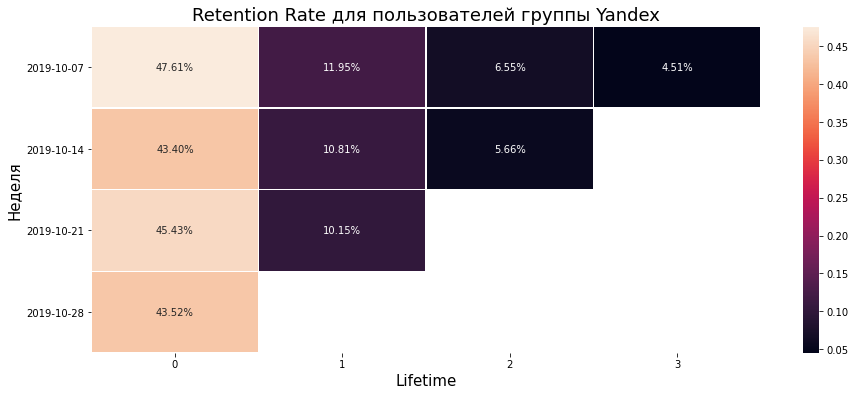

In [63]:
plt.figure(figsize=(15, 6))  # задаём размер графика
ax = sns.heatmap(
    retention_yandex,  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
    linewidths=0.5
)
plt.xlabel('Lifetime', fontsize=15)
plt.ylabel('Неделя', fontsize=15)
plt.title('Retention Rate для пользователей группы Yandex', fontsize=18)  # название графика
ax.set_yticklabels(retention_yandex.index.date)
plt.show() 

**Удержание пользователей `Yandex`:**
* 2 неделя - 10,97%
* 3 неделя - 6,1%
* 4 неделя - 4,51%

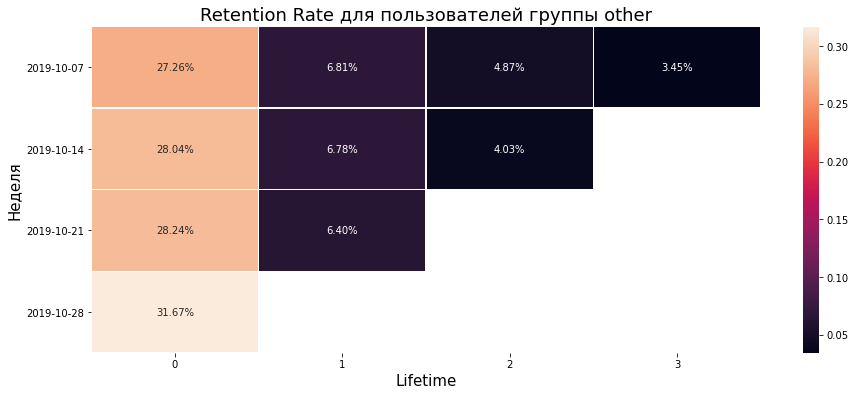

In [64]:
plt.figure(figsize=(15, 6))  # задаём размер графика
ax = sns.heatmap(
    retention_other,  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
    linewidths=0.5
)
plt.xlabel('Lifetime', fontsize=15)
plt.ylabel('Неделя', fontsize=15)
plt.title('Retention Rate для пользователей группы other', fontsize=18)  # название графика
ax.set_yticklabels(retention_other.index.date)
plt.show() 

**Удержание пользователей `Other`:**
* 2 неделя - 6,6%
* 3 неделя - 4,45%
* 4 неделя - 3,45%

**Рассчитываю средний коэффициент удержания когорт для каждой группы**

In [65]:
print('2 неделя', ((retention_google[1].mean())*100).round(2), '%')
print('3 неделя', ((retention_google[2].mean())*100).round(2), '%')
print('4 неделя', ((retention_google[3].mean())*100).round(2), '%')

2 неделя 5.74 %
3 неделя 3.62 %
4 неделя 2.57 %


In [66]:
print('2 неделя', ((retention_yandex[1].mean())*100).round(2), '%')
print('3 неделя', ((retention_yandex[2].mean())*100).round(2), '%')
print('4 неделя', ((retention_yandex[3].mean())*100).round(2), '%')

2 неделя 10.97 %
3 неделя 6.1 %
4 неделя 4.51 %


In [67]:
print('2 неделя', ((retention_other[1].mean())*100).round(2), '%')
print('3 неделя', ((retention_other[2].mean())*100).round(2), '%')
print('4 неделя', ((retention_other[3].mean())*100).round(2), '%')

2 неделя 6.66 %
3 неделя 4.45 %
4 неделя 3.45 %


**Удержание пользователей `Google`:**
* 2 неделя - 5,71%
* 3 неделя - 3,62%
* 4 неделя - 2,57%

**Удержание пользователей `Yandex`:**
* 2 неделя - 10,97%
* 3 неделя - 6,1%
* 4 неделя - 4,51%

**Удержание пользователей `Other`:**
* 2 неделя - 6,6%
* 3 неделя - 4,45%
* 4 неделя - 3,45%

**Самое лучшее удержание у пользователей, которые пришли в приложение через `Yandex`, чуть хуже через источник трафика `other`, а самое низкое удержание у пользователей, пришедших через `Google`**

# Рассчитываю конверсию для пользователей из каждой группы

**Создаю таблицы для рассчёта конверсии для каждой группы пользователей, вывожу её на экран**

In [68]:
conversion_google = data.query('event_name == "contacts_show"').query('source == "google"').agg({'user_id': 'nunique'}).reset_index()
conversion_google = conversion_google.rename(columns = {'index': 'user_id', 0: 'user_contacts_show'})
conversion_google

,user_id,user_contacts_show
0,user_id,275


In [69]:
conversion_yandex = data.query('event_name == "contacts_show"').query('source == "yandex"').agg({'user_id': 'nunique'}).reset_index()
conversion_yandex = conversion_yandex.rename(columns = {'index': 'user_id', 0: 'user_contacts_show'})
conversion_yandex

,user_id,user_contacts_show
0,user_id,478


In [70]:
conversion_other = data.query('event_name == "contacts_show"').query('source == "other"').agg({'user_id': 'nunique'}).reset_index()
conversion_other = conversion_other.rename(columns = {'index': 'user_id', 0: 'user_contacts_show'})
conversion_other

,user_id,user_contacts_show
0,user_id,228


**Создаю таблицу для каждой группы пользователей для дальнейшего рассчёта конверсии**

In [71]:
data_google = data.query('source == "google"')
data_google

,event_time,event_name,user_id,source,event_date
37,2019-10-07 00:09:33,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07
44,2019-10-07 00:11:48,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07
49,2019-10-07 00:13:34,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07
50,2019-10-07 00:13:45,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07
57,2019-10-07 00:15:03,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07
...,...,...,...,...,...
74192,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03
74194,2019-11-03 23:56:57,search,20850c8f-4135-4059-b13b-198d3ac59902,google,2019-11-03
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03


In [72]:
data_yandex = data.query('source == "yandex"')
data_yandex

,event_time,event_name,user_id,source,event_date
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
5,2019-10-07 00:01:19,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
8,2019-10-07 00:01:49,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
11,2019-10-07 00:02:06,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
...,...,...,...,...,...
74181,2019-11-03 23:47:35,photos_show,12681fdf-d1d1-454b-9b92-e8a3ccfaf07b,yandex,2019-11-03
74184,2019-11-03 23:48:47,tips_click,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,2019-11-03
74187,2019-11-03 23:50:05,tips_click,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,2019-11-03
74188,2019-11-03 23:51:08,tips_click,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,2019-11-03


In [73]:
data_other = data.query('source == "other"')
data_other

,event_time,event_name,user_id,source,event_date
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
6,2019-10-07 00:01:27,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
7,2019-10-07 00:01:34,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
...,...,...,...,...,...
74105,2019-11-03 23:05:37,photos_show,804ba62d-0844-44cf-9853-0fd2d03ce3c8,other,2019-11-03
74116,2019-11-03 23:09:27,tips_show,87a6fff9-134a-467d-a100-a606995025cd,other,2019-11-03
74118,2019-11-03 23:09:53,contacts_show,87a6fff9-134a-467d-a100-a606995025cd,other,2019-11-03
74121,2019-11-03 23:10:21,tips_show,87a6fff9-134a-467d-a100-a606995025cd,other,2019-11-03


**Считаю конверсию отношением пользователей, совершивших целевое действие `contacts_show` к уникальным пользователям, вывожу таблицы на экран**

In [74]:
conversion_google['conversion'] = conversion_google['user_contacts_show'] / (data_google['user_id'].nunique())
conversion_google

,user_id,user_contacts_show,conversion
0,user_id,275,0.243578


In [75]:
conversion_yandex['conversion'] = conversion_yandex['user_contacts_show'] / (data_yandex['user_id'].nunique())
conversion_yandex

,user_id,user_contacts_show,conversion
0,user_id,478,0.247156


In [76]:
conversion_other['conversion'] = conversion_other['user_contacts_show'] / (data_other['user_id'].nunique())
conversion_other

,user_id,user_contacts_show,conversion
0,user_id,228,0.185366


**Конверсия пользователей по группам:**
* Yandex - 0.247156
* Google - 0.243578
* Other - 0.185366

**Самую худшую конверсию показывает группа пользователей `Other`, `Google` и `Yandex` показывают примерно одинаковую конверсию, но при этом у `Yandex` она слегка выше**

# Вывод по сегмнетации:
- Пользователи были раздены на 3 группы: `Google`, `Yandex` и `Other`
- `Google` и `Yandex` имеют примерно одинаковые конверсии
- Пользователи группы `Other` имеют самую низкую конверсию
- Лучший показатель Retention Rate наблюдается у пользователей `Yandex`
- Худший показатель Retention Rate наблюдается у пользователей `Google`

**Рекомендации:**
- Обратить внимание на пользователей, привлечённых в приложении через `Google`, несмотря на их низкое удержание в приложении, они имеют примерно такую же конверсию, как и пользователи `Yandex`
- Стараться привлекать больше пользователей `Yandex`, так как они имеют лучшие показатели Retenrion Rate и конверсии

# Формулировка гипотез и их проверка

**Гипотеза №1. Некоторые пользователи установили приложение по ссылке из `Yandex`, другие — из `Google`. Проверить гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.**

H0 - статистически значимых различий в конверсиях между группами пользователей нет (нулевая гипотеза)

H1 - статистические различия между конверсиями групп пользователей есть (альтернативная гипотеза)

**Создаю таблицу для рассчёта конверсии в группах `Yandex` и `Google`**

In [77]:
conversion = data.query('event_name == "contacts_show"').groupby('source').agg({'user_id': 'nunique'}).reset_index()
conversion = conversion.rename(columns = {'user_id': 'user_contacts_show'})
conversion

,source,user_contacts_show
0,google,275
1,other,228
2,yandex,478


In [78]:
conversion_google_yandex = conversion.query('source == "google" or source == "yandex"')
conversion_google_yandex['unique_users_google'] = (data.query('source == "google"')['user_id'].nunique())
conversion_google_yandex['unique_users_yandex'] = (data.query('source == "yandex"')['user_id'].nunique())
conversion_google_yandex

,source,user_contacts_show,unique_users_google,unique_users_yandex
0,google,275,1129,1934
2,yandex,478,1129,1934


**Проверяю статистическую гипотезу**

In [79]:
alpha = 0.05  

event_users = np.array([conversion_google_yandex.query('source == "google"')['user_contacts_show'],
                        conversion_google_yandex.query('source == "yandex"')['user_contacts_show']])
total_users = np.array([conversion_google_yandex.query('source == "google"')['unique_users_google'],
                        conversion_google_yandex.query('source == "yandex"')['unique_users_yandex']])


#конверсия для обеих групп
p1 = event_users[0]/total_users[0]
p2 = event_users[1]/total_users[1]
#в комбинированном
p_combined = (event_users[0] + event_users[1]) / (total_users[0] + total_users[1])
#разница конверсий в датасетах
difference = p1 - p2
#считаю статистику в стандартных отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * \
                                    (1 / total_users[0] + 1 / total_users[1]))

#задаю стандартное нормальное распределение со средним 0 и стандартным отклонением 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями групп есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии в группах разными')

p-значение:  [0.8244316]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии в группах разными


**Нулевая гипотеза подтвердилась, статистически значимых различий в конверсиях между группами пользователей нет**

**Формулирую собственную гипотезу и проверяю её**

**Гипотеза №2. Некоторые пользователи установили приложение по ссылке из `Yandex`, другие — из `Google`. Проверить гипотезу: две эти группы демонстрируют разную длительность пользовательских сессий**

H0 - разницы между длительностью пользовательских сессий нет (нулевая гипотеза)

H1 - разница между длительностью пользовательских сессий есть (альтернативная гипотеза)

**Добавляю столбец длительности `session_duration_seconds` сессии в секундах, вывожу таблицу на экран**

In [80]:
session['session_duration_seconds'] = session['session_duration'] * 60
session

,user_id,event_date,event_time_max,event_time_min,session_duration,session_duration_minute,session_duration_seconds
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:41,2019-10-07 13:39:45,596,9.9,35760
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:42:22,2019-10-09 18:33:55,507,8.4,30420
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 20:07:30,2019-10-21 19:52:30,900,15.0,54000
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:30:52,2019-10-22 11:18:14,758,12.6,45480
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:59:54,2019-10-19 21:34:33,1521,25.4,91260
...,...,...,...,...,...,...,...
7812,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-29,2019-10-29 16:13:00,2019-10-29 13:58:47,8053,134.2,483180
7813,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-30,2019-10-30 11:31:45,2019-10-30 00:15:43,40562,676.0,2433720
7814,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-01,2019-11-01 00:24:53,2019-11-01 00:24:31,22,0.4,1320
7815,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,2019-11-02 19:30:50,2019-11-02 01:16:48,65642,1094.0,3938520


**Объединяю таблицы `session` и `data` для дальнейшей работы с проверкой гипотезы, вывожу её на экран**

In [81]:
source_duration = session.merge(data, on='user_id', how='left')
source_duration

,user_id,event_date_x,event_time_max,event_time_min,session_duration,session_duration_minute,session_duration_seconds,event_time,event_name,source,event_date_y
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:41,2019-10-07 13:39:45,596,9.9,35760,2019-10-07 13:39:45,tips_show,other,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:41,2019-10-07 13:39:45,596,9.9,35760,2019-10-07 13:40:31,tips_show,other,2019-10-07
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:41,2019-10-07 13:39:45,596,9.9,35760,2019-10-07 13:41:05,tips_show,other,2019-10-07
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:41,2019-10-07 13:39:45,596,9.9,35760,2019-10-07 13:43:20,tips_show,other,2019-10-07
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:41,2019-10-07 13:39:45,596,9.9,35760,2019-10-07 13:45:30,tips_show,other,2019-10-07
...,...,...,...,...,...,...,...,...,...,...,...
264985,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,2019-11-03 16:08:25,2019-11-03 14:32:55,5730,95.5,343800,2019-11-03 15:51:23,tips_show,google,2019-11-03
264986,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,2019-11-03 16:08:25,2019-11-03 14:32:55,5730,95.5,343800,2019-11-03 15:51:57,contacts_show,google,2019-11-03
264987,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,2019-11-03 16:08:25,2019-11-03 14:32:55,5730,95.5,343800,2019-11-03 16:07:40,tips_show,google,2019-11-03
264988,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,2019-11-03 16:08:25,2019-11-03 14:32:55,5730,95.5,343800,2019-11-03 16:08:18,tips_show,google,2019-11-03


**Проверяю гипотезу**

In [82]:
alpha = 0.05 

results = st.ttest_ind(source_duration.query('source == "google"')['session_duration_minute'],
                       source_duration.query('source == "yandex"')['session_duration_minute'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.720019888234591e-10
Отвергаем нулевую гипотезу


**Нулевая гипотеза не подтвердилась, разница между длительностью пользовательских сессий пользователей, пришедших из `Google` и `Yandex`, есть**

# Общий вывод:

# Выполнена предобработка данных.

# Выполнен исследовательский анализ данных:
- **Всего в данных 4293 уникальных пользователя**
- **Первая пользовательская сессия была 7 октября в 00:00, последняя - 3 ноября в 23:58:12**
- **На графике распределения событий по датам заметен спад количества событий 12 октября**
- **Максимальная длительность сессии в сутки составила почти 1417 минут, 25% пользователей тратят в сутки 2.5 минуты, 50% пользоваталей пользуются приложением всего 11.8 минут в сутки, 75% пользователей пользуются приложением 48.8 минут в сутки**
- **Пользователи видят рекомендованные объялвения более, чем в 4 раз чаще, чем любое другое действие в приложении**
- **Ко второй неделе жизни когорт Retention Rate примерно 23%, к концу 4 недели пользователей остаётся всего 10,5%**
- **В среднем конверсия в приложении 22%, примерно каждый 4-5 пользователь просматривает номер телефона в приложении**

# Сегментация

**Пользователи попадают в приложение благодаря 3 источникам трафкам `Yandex`, `Google` и `other`. Источником трафика `other` могут быть другие социальные сети, а также другие поисковые сайты. Чтобы в дальнейшем настроить рекламу, чтобы привлечь более подходящих нам пользователей с более высокой конверсией и Retention Rate, мы можем разделить пользователей на 3 группы: `Yandex`, `Google` и `other`, посчитать Retention Rate и конверсию в каждой из групп, чтобы понять, через какой источник трафика стоит привлекать больше всего пользователей, а через какой - не нужно. В конечном итоге результаты этого раздлеления могли бы принести прибыль для приложения. В каждой группе пользователей мы имеем достаточно данных, чтобы это разделение получилось с хорошей выборкой (`Yandex` - 1934 пользователей, `Google` - 1129 пользователей, `Other` - 1230)**

- Пользователи не пересекаются между собой
- Самый маленький сегмент (`Other`) составляет более 10% от самого большого сегмента (`Yandex`)

Выполнена сегментация пользователей на группы на основе их действий:
- **Пользователи скачали приложение благодаря 3 источникам трафика, соответственно пользователи были разделены на 3 группы: `Yandex`, `Google` и `other`**
- **Самое лучшее удержание у пользователей, которые пришли в приложение через `Yandex`, чуть хуже через источник трафика `other`, а самое низкое удержание у пользователей, пришедших через `Google`**
- **Самую худшую конверсию показывает группа пользователей `Other`. `Google` и `Yandex` показывают примерно одинаковую конверсию, но при этом у `Yandex` она слегка выше**

Удержание пользователей `Google`:

2 неделя - 5,71%

3 неделя - 3,62%

4 неделя - 2,57%

Удержание пользователей `Yandex`:

2 неделя - 10,97%

3 неделя - 6,1%

4 неделя - 4,51%

Удержание пользователей `Other`:

2 неделя - 6,6%

3 неделя - 4,45%

4 неделя - 3,45%

Конверсия пользователей по группам:

`Yandex` - 0.247156

`Google` - 0.243578

`Other` - 0.185366


# Выполнена проверка гипотез: 
- **Статистически значимых различий в конверсиях между группами пользователей нет**
- **разница между длительностью пользовательских сессий пользователей, пришедших из `Google` и `Yandex`, есть**

# Рекомендации:
- Обратить внимание на пользователей, привлечённых в приложении через `Google`, несмотря на их низкое удержание в приложении, они имеют примерно такую же конверсию, как и пользователи `Yandex`
- Стараться привлекать больше пользователей `Yandex`, так как они имеют лучшие показатели Retenrion Rate и конверсии

# Дашборд

<https://public.tableau.com/app/profile/denis.volovik/viz/_16849614742840/sheet2?publish=yes>

# Презентация

<https://docs.google.com/presentation/d/1tQa3MGHgFztYChZoQxsjqrsLigRjpGGmYX6n3BN9Gsg/edit?usp=sharing>